In [12]:
import numpy as np
import pandas as pd 
import keras
import matplotlib.pyplot as plt
! python -V
%matplotlib inline

Python 3.5.2 :: Continuum Analytics, Inc.


## sklearn

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = MLPClassifier(hidden_layer_sizes=(100, ), solver="sgd",random_state=0,max_iter=10000)
clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))

0.955555555556


## keras

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [9]:
# モデルの定義
model = Sequential()

# 隠れ層の定義
model.add(Dense(input_dim = 4, output_dim = 100))

# 隠れ層の活性化関数
model.add(Activation('relu'))
# 出力層の定義
model.add(Dense(output_dim = 3))
# 出力層の活性化関数
model.add(Activation('softmax'))

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])


# 学習
hist = model.fit(X_train, y_train, nb_epoch = 50, batch_size = 1, verbose =1)


Epoch 1/50
105/105 [==============================] - 0s - loss: 0.0917 - acc: 0.9714      
Epoch 2/50
105/105 [==============================] - 0s - loss: 0.1034 - acc: 0.9714         
Epoch 3/50
105/105

In [11]:
# eval
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/45 [====================>.........] - ETA: 0sTest loss: 0.14390194681
Test accuracy: 0.95555555688


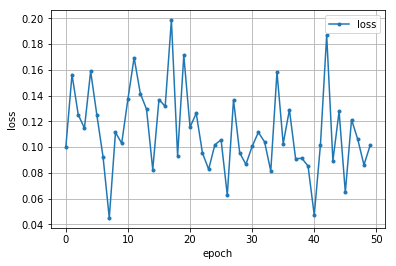

In [19]:
# plot loss
loss = hist.history['loss']
# val_loss = hist.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
# plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()